In [1]:
# 12:20 PM
# 12:35 PM
# 12:45 PM
import os
print(os.path.dirname(os.getcwd()).split('\\')[-1])

06-Stu_Ripple


<font color='red'>Comment</font>

Skip over this repeat code. There's more important steps to focus on.

In [2]:
import arch as arch
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pathlib import Path
csvpath = Path('../Resources/USD_per_Ripple_XRP_prices.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Timestamp')
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,symbol,exchange
Timestamp,,,,,,,,
2017-08-05 00:00:00+00:00,39450,0.17436,0.19499,0.17199,0.18494,1.177092e+07,XRP/USD,Kraken
2017-08-06 00:00:00+00:00,39451,0.18420,0.19138,0.17900,0.18106,6.964988e+06,XRP/USD,Kraken
2017-08-07 00:00:00+00:00,39452,0.18095,0.18270,0.17651,0.17849,6.742669e+06,XRP/USD,Kraken
2017-08-08 00:00:00+00:00,39453,0.17889,0.19790,0.17700,0.19785,1.087657e+07,XRP/USD,Kraken
2017-08-09 00:00:00+00:00,39454,0.19629,0.19750,0.18340,0.18700,7.204952e+06,XRP/USD,Kraken


<AxesSubplot:xlabel='Timestamp'>

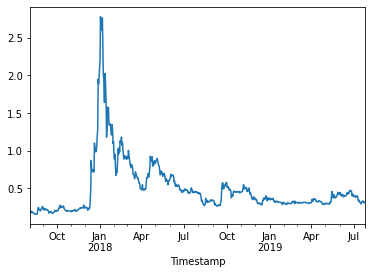

In [4]:
df.Close.plot()

In [5]:
# Create a series using "Close" price percentage returns, drop any NaNs, and check the results:
# (Make sure to multiply the pct_change() results by *100)
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df['Return'].shift()
df = df.dropna()
df.tail()

,Unnamed: 0,Open,High,Low,Close,Volume,symbol,exchange,Return,Lagged_Return
Timestamp,,,,,,,,,,
2019-07-21 00:00:00+00:00,40165,0.33349,0.33552,0.32142,0.33127,1.717580e+07,XRP/USD,Kraken,-0.665687,4.144026
2019-07-22 00:00:00+00:00,40166,0.33127,0.33242,0.31551,0.32086,7.349218e+06,XRP/USD,Kraken,-3.142452,-0.665687
2019-07-23 00:00:00+00:00,40167,0.32086,0.32086,0.30580,0.30784,8.161499e+06,XRP/USD,Kraken,-4.057845,-3.142452
2019-07-24 00:00:00+00:00,40168,0.30784,0.31850,0.30276,0.31611,8.728234e+06,XRP/USD,Kraken,2.686460,-4.057845
2019-07-25 00:00:00+00:00,40169,0.31611,0.32386,0.31156,0.31269,1.051660e+07,XRP/USD,Kraken,-1.081902,2.686460


<AxesSubplot:xlabel='Timestamp'>

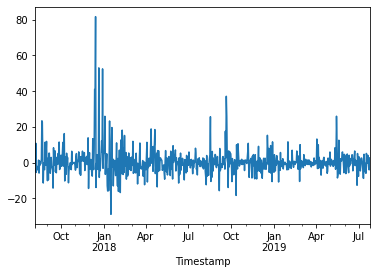

In [6]:
df['Return'].plot()

---

# Linear Regression with Train/Test split

In [7]:
# Create a train/test split for the data using 2017-2018 for training and 2019 for testing
train = df['2017':'2018']
test = df['2019']

In [8]:
# Create four DataFrames:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]

X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [9]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [10]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [11]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>],
      dtype=object)

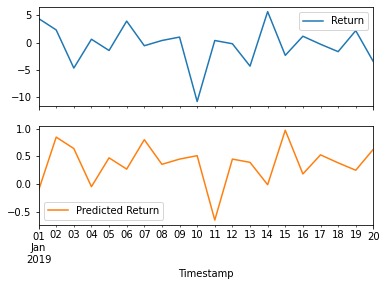

In [17]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)
#Results[:20].plot()

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the DataFrame above)
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 4.359200165217197


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [14]:
# Construct a DataFrame using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 8.640276753817128


In [ ]:
<font color='red'>Comment</font>

Out-of-sample error is lower again. This might be because the out-of-sample period is small...small sample sizes can exhibit unnormal behavior.

---

Question: How does the model perform out-of-sample (on data that it has never seen before)? Are the predictions as good as, better, or worse than those that were observed for the training dataset?

Answer: The out-of-sample RMSE is lower than the in-sample RMSE. RMSE is typically lower for training data, but is higher in this case.